<a href="https://colab.research.google.com/github/harshavardhangadila/Training-Neural-networks-with-Keras/blob/main/Part%201/F_Batch_Norm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
tf.random.set_seed(42)


In [2]:
# Load dataset
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize to [0, 1]
x_train_full = x_train_full.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Expand dimensions for Conv2D input
x_train_full = np.expand_dims(x_train_full, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Subset data
x_train, y_train = x_train_full[:4500], y_train_full[:4500]
x_val, y_val = x_train_full[4500:5000], y_train_full[4500:5000]

print("Training samples:", x_train.shape)
print("Validation samples:", x_val.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: (4500, 28, 28, 1)
Validation samples: (500, 28, 28, 1)


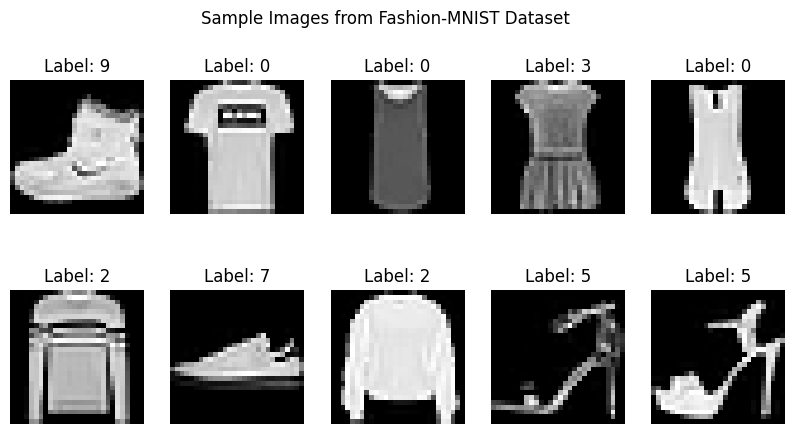

In [3]:
# Plot sample images from training data
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample Images from Fashion-MNIST Dataset")
plt.show()


In [4]:
# Build model with optional Batch Normalization
def build_model(use_batch_norm=False):
    model = keras.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    if use_batch_norm:
        model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    model.add(layers.Conv2D(64, (3, 3), padding='same'))
    if use_batch_norm:
        model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    model.add(layers.MaxPooling2D())
    model.add(layers.Flatten())

    model.add(layers.Dense(128))
    if use_batch_norm:
        model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [5]:
# Model without batch normalization
model_no_bn = build_model(use_batch_norm=False)
history_no_bn = model_no_bn.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,
    batch_size=64,
    verbose=2
)

# Model with batch normalization
model_bn = build_model(use_batch_norm=True)
history_bn = model_bn.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,
    batch_size=64,
    verbose=2
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
71/71 - 7s - 102ms/step - accuracy: 0.7222 - loss: 0.7689 - val_accuracy: 0.8480 - val_loss: 0.4217
Epoch 2/20
71/71 - 0s - 7ms/step - accuracy: 0.8378 - loss: 0.4483 - val_accuracy: 0.8700 - val_loss: 0.3621
Epoch 3/20
71/71 - 0s - 6ms/step - accuracy: 0.8742 - loss: 0.3627 - val_accuracy: 0.8860 - val_loss: 0.3284
Epoch 4/20
71/71 - 1s - 10ms/step - accuracy: 0.8982 - loss: 0.2945 - val_accuracy: 0.8940 - val_loss: 0.3156
Epoch 5/20
71/71 - 1s - 9ms/step - accuracy: 0.9227 - loss: 0.2384 - val_accuracy: 0.9080 - val_loss: 0.2875
Epoch 6/20
71/71 - 1s - 19ms/step - accuracy: 0.9384 - loss: 0.1888 - val_accuracy: 0.9140 - val_loss: 0.2730
Epoch 7/20
71/71 - 0s - 6ms/step - accuracy: 0.9547 - loss: 0.1438 - val_accuracy: 0.9120 - val_loss: 0.2833
Epoch 8/20
71/71 - 0s - 6ms/step - accuracy: 0.9607 - loss: 0.1178 - val_accuracy: 0.9080 - val_loss: 0.3249
Epoch 9/20
71/71 - 0s - 6ms/step - accuracy: 0.9638 - loss: 0.1096 - val_accuracy: 0.8680 - val_loss: 0.4475
Epoch 10/20
71/

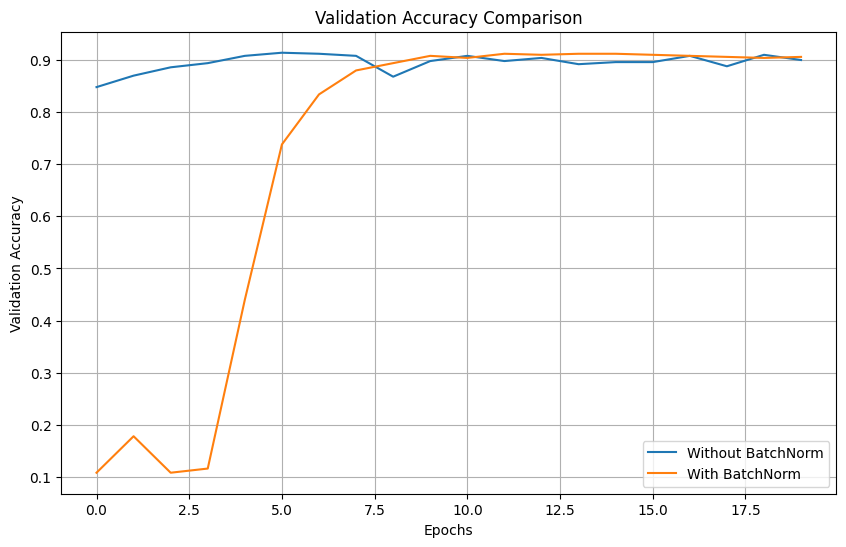

In [6]:
# Compare validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_no_bn.history['val_accuracy'], label="Without BatchNorm")
plt.plot(history_bn.history['val_accuracy'], label="With BatchNorm")
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


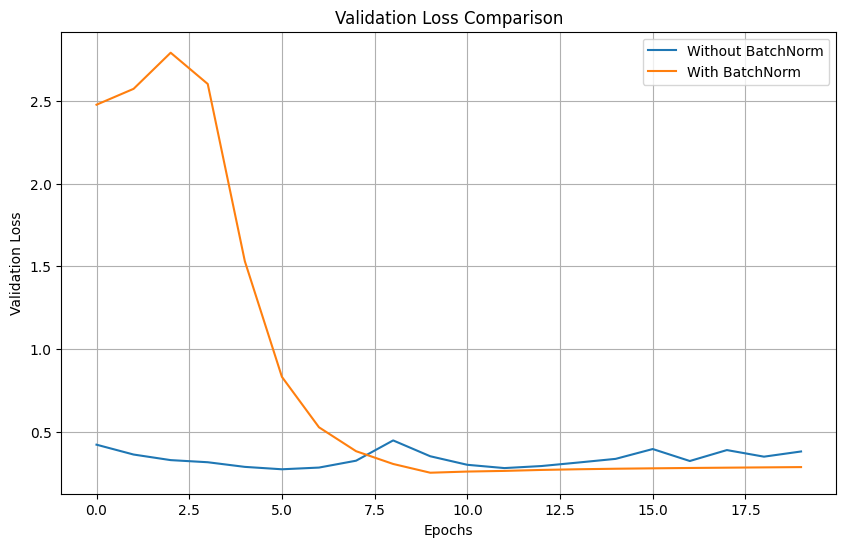

In [7]:
# Compare validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_no_bn.history['val_loss'], label="Without BatchNorm")
plt.plot(history_bn.history['val_loss'], label="With BatchNorm")
plt.title("Validation Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid(True)
plt.show()


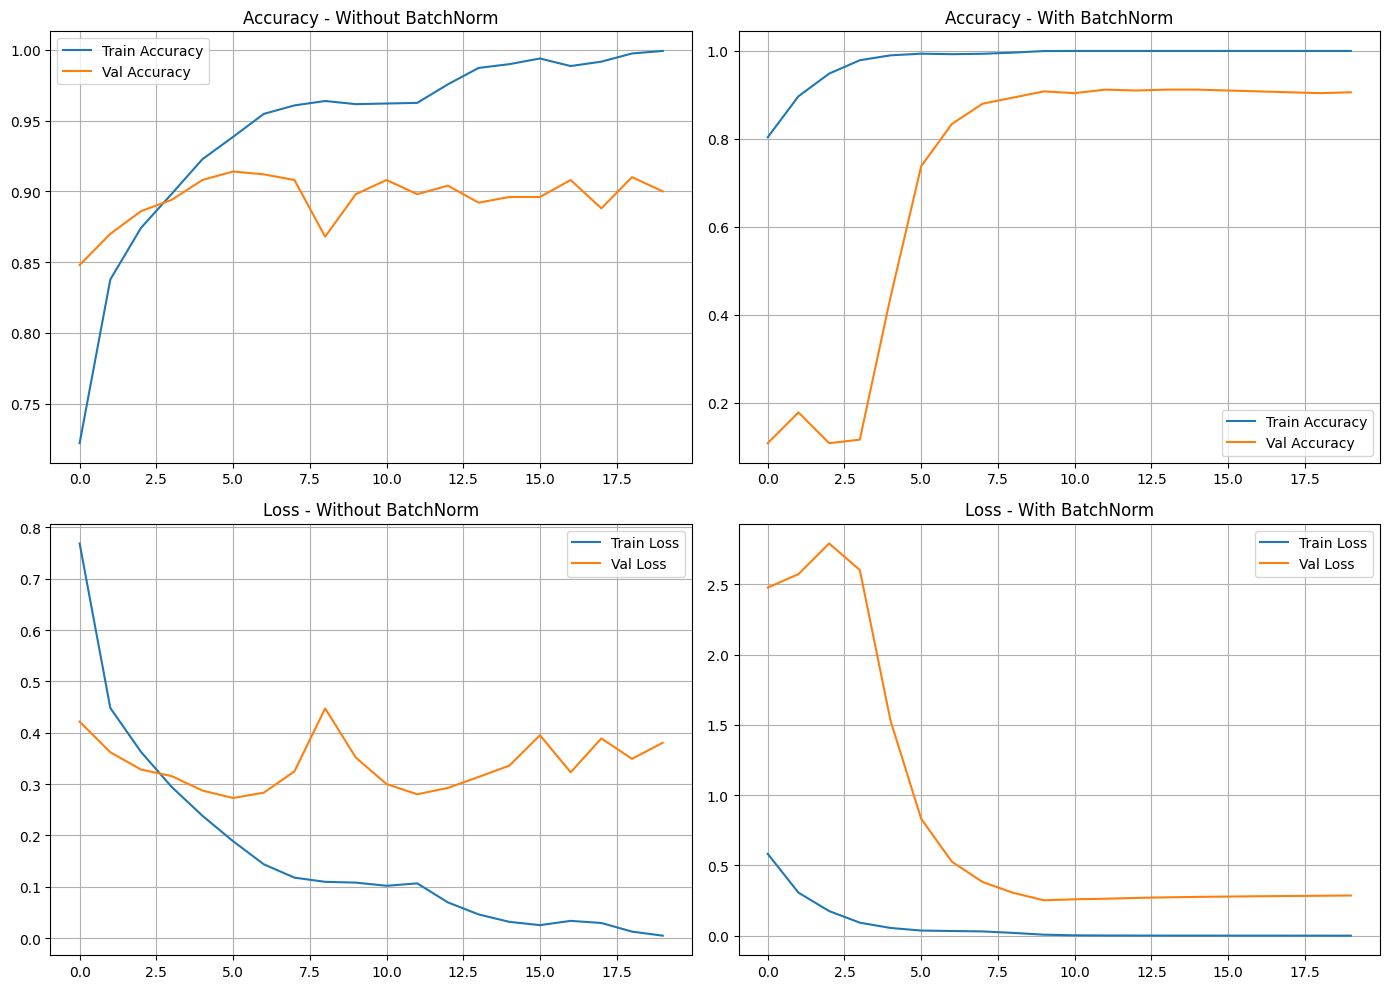

In [8]:
# Plot training vs validation side-by-side
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy - No BN
axs[0, 0].plot(history_no_bn.history['accuracy'], label="Train Accuracy")
axs[0, 0].plot(history_no_bn.history['val_accuracy'], label="Val Accuracy")
axs[0, 0].set_title("Accuracy - Without BatchNorm")
axs[0, 0].legend()
axs[0, 0].grid(True)

# Accuracy - BN
axs[0, 1].plot(history_bn.history['accuracy'], label="Train Accuracy")
axs[0, 1].plot(history_bn.history['val_accuracy'], label="Val Accuracy")
axs[0, 1].set_title("Accuracy - With BatchNorm")
axs[0, 1].legend()
axs[0, 1].grid(True)

# Loss - No BN
axs[1, 0].plot(history_no_bn.history['loss'], label="Train Loss")
axs[1, 0].plot(history_no_bn.history['val_loss'], label="Val Loss")
axs[1, 0].set_title("Loss - Without BatchNorm")
axs[1, 0].legend()
axs[1, 0].grid(True)

# Loss - BN
axs[1, 1].plot(history_bn.history['loss'], label="Train Loss")
axs[1, 1].plot(history_bn.history['val_loss'], label="Val Loss")
axs[1, 1].set_title("Loss - With BatchNorm")
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


In [9]:
# Final validation accuracy
print(f"Final Val Accuracy without BatchNorm: {history_no_bn.history['val_accuracy'][-1]:.4f}")
print(f"Final Val Accuracy with BatchNorm: {history_bn.history['val_accuracy'][-1]:.4f}")


Final Val Accuracy without BatchNorm: 0.9000
Final Val Accuracy with BatchNorm: 0.9060
